# Pandas Basics
---
- Homepage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
---

## We are going to:<br>
1. import the necessary libraries
2. get data
3. check data
4. if necessary: correct or improve data
5. analyze data
6. plot data
---

### We are using pandas for data wrangling (there is really only 1 choice), but for plotting there are many choices:

- [Matplotlib](https://matplotlib.org/index.html) is a very elaborate plotting library, which can do anything but sometimes it is too elaborate.
- For statistical plotting [Seaborn](https://seaborn.pydata.org/) is a better choice: seaborn is built on top of matplotlib, easier to use, and gives you nice plots out of the box.
- For interactive plotting [HvPlot](https://hvplot.holoviz.org/) or [plotly.express](https://plot.ly/python/plotly-express/) are the best options.
---

### 1. Importing libaries and setting plotting defaults

In [1]:
# data wrangling libraries
import pandas as pd

# plotting libraries matplotlib and seaborn
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# set some nice plotting settings
sns.set(style='white', font_scale=1.25)

### 2. Getting data

#### There are many ways to read in data, of which pd.read_csv() is just one method.

In [2]:
file_name = 'https://raw.githubusercontent.com/SandervandenOord/regression_training/master/data/anscombe.csv'

df = pd.read_csv(file_name, sep=',', header=0)

### 3. Check data

#### Get a first impression of your data with df.head()

In [3]:
df.head(3)

,dataset,x,y
0,I,10.000,8.040
1,I,8.000,6.950
2,I,13.000,7.580


#### Or check the last rows of your data with df.tail()

In [4]:
df.tail(3)

,dataset,x,y
41,IV,8.000,5.560
42,IV,8.000,7.910
43,IV,8.000,6.890


#### Get information (= metadata) about your dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


#### Check for missing values

In [6]:
df.isna().sum()

dataset    0
x          0
y          0
dtype: int64

#### Select 1 column of your dataset (this returns a series)

In [7]:
df['x'].head(3)

0   10.000
1    8.000
2   13.000
Name: x, dtype: float64

In [8]:
df.x.head(3)

0   10.000
1    8.000
2   13.000
Name: x, dtype: float64

In [9]:
df.loc[:, 'x'].head(3)

0   10.000
1    8.000
2   13.000
Name: x, dtype: float64

In [10]:
df.iloc[:, 1].head(3)

0   10.000
1    8.000
2   13.000
Name: x, dtype: float64

#### Select 1 specific row of your dataset

In [11]:
df.loc[2]

dataset        I
x         13.000
y          7.580
Name: 2, dtype: object

#### Query your dataset

In [12]:
df[df['x'] > 13]

,dataset,x,y
5,I,14.000,9.960
16,II,14.000,8.100
27,III,14.000,8.840
40,IV,19.000,12.500


In [13]:
df[(df['x'] > 13) & (df['y'] < 9)]

,dataset,x,y
16,II,14.000,8.100
27,III,14.000,8.840


In [14]:
df.query('x > 13')

,dataset,x,y
5,I,14.000,9.960
16,II,14.000,8.100
27,III,14.000,8.840
40,IV,19.000,12.500


In [15]:
df.query('x > 13 and y < 9')

,dataset,x,y
16,II,14.000,8.100
27,III,14.000,8.840


In [16]:
df.query('x > 13 and y < 9 and dataset == "II"')

,dataset,x,y
16,II,14.000,8.100


### 4. Correct or improve data

#### Easily create new columns with assignment

In [17]:
df['total'] = df['x'] + df['y']
df.head(3)

,dataset,x,y,total
0,I,10.000,8.040,18.040
1,I,8.000,6.950,14.950
2,I,13.000,7.580,20.580


#### Or drop a column

In [18]:
df.drop(columns=['total'], inplace=True)
df.head(3)

,dataset,x,y
0,I,10.000,8.040
1,I,8.000,6.950
2,I,13.000,7.580


#### Look at or change the columns of your dataframe

In [19]:
df.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [20]:
df.columns = ['dataset', 'other_name', 'y']
df.head(1)

,dataset,other_name,y
0,I,10.000,8.040


In [21]:
df.rename(columns={'other_name': 'x'}, inplace=True)
df.head(1)

,dataset,x,y
0,I,10.000,8.040


#### Check out your index

In [22]:
df.index

RangeIndex(start=0, stop=44, step=1)

### 5. Analyze data

#### Calculate descriptive statistics of your dataframe

In [23]:
df.mean()

x   9.000
y   7.501
dtype: float64

#### Or get a lot of information at once with .describe()

In [24]:
df.describe()

,x,y
count,44.000,44.000
mean,9.000,7.501
std,3.199,1.959
min,4.000,3.100
25%,7.000,6.117
50%,8.000,7.520
75%,11.000,8.747
max,19.000,12.740


#### Or group your data by certain columns. This is similar to using a pivot table in Excel.

In [25]:
df.groupby('dataset').count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [26]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.000,7.501
II,9.000,7.501
III,9.000,7.500
IV,9.000,7.501


### 6. Plot data

#### Using matplotlib to plot

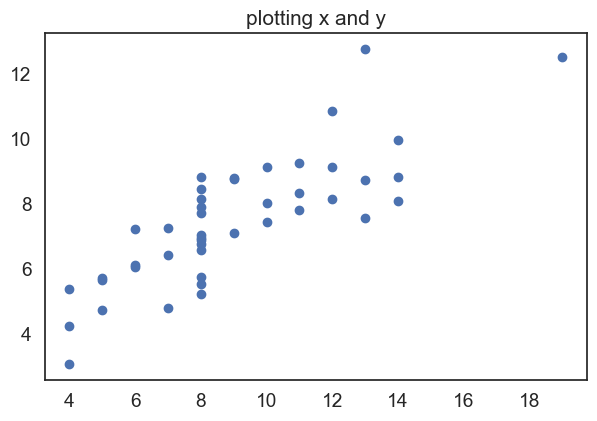

In [27]:
plt.scatter(df['x'], df['y'])
plt.title('plotting x and y');

#### Using seaborn to plot

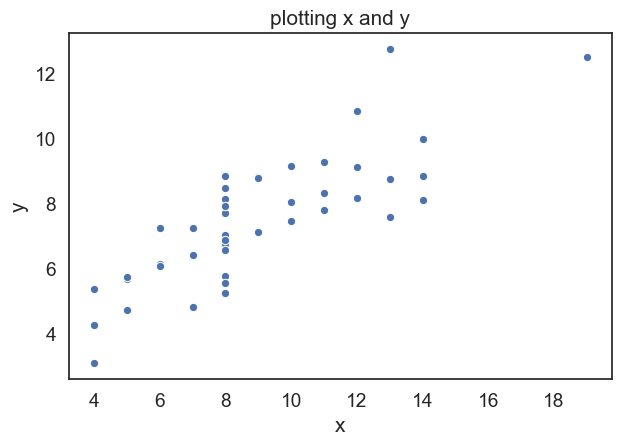

In [28]:
sns.scatterplot(x='x', y='y', data=df)
plt.title('plotting x and y');

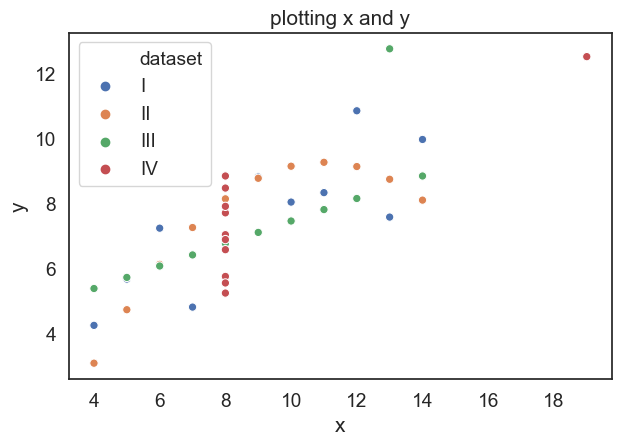

In [29]:
sns.scatterplot(x='x', y='y', data=df, hue='dataset')
plt.title('plotting x and y');

#### Using plotly express to get an interactive plot

In [31]:
px.scatter(data_frame=df, x='x', y='y', hover_data=['dataset'], color='dataset')